In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)
library(phyloseq)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(linewidth=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", linewidth=0.2, linetype = 'dashed'),
        panel.grid.major.x = element_line(colour = "grey", linewidth=0.2),
        panel.grid.minor.y = element_line(colour = "grey", linewidth = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", linewidth=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

In [4]:
# modified from https://www.biostars.org/p/455240/
metaphlanToPhyloseq <- function(
    tax,
    metadat=NULL,
    simplenames=TRUE,
    roundtointeger=FALSE,
    split="|"){
    ## tax is a matrix or data.frame with the table of taxonomic abundances, rows are taxa, columns are samples
    ## metadat is an optional data.frame of specimen metadata, rows are samples, columns are variables
    ## if simplenames=TRUE, use only the most detailed level of taxa names in the final object
    ## if roundtointeger=TRUE, values will be rounded to the nearest integer
    xnames = rownames(tax)
    shortnames = gsub(paste0(".+\\", split), "", xnames)
    if(simplenames){
        rownames(tax) = shortnames
    }
    if(roundtointeger){
        tax = round(tax * 1e4)
    }
    x2 = strsplit(xnames, split=split, fixed=TRUE)
    taxmat = matrix(NA, ncol=max(sapply(x2, length)), nrow=length(x2))
    colnames(taxmat) = c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "Strain")[1:ncol(taxmat)]
    rownames(taxmat) = rownames(tax)
    for (i in 1:nrow(taxmat)){
        taxmat[i, 1:length(x2[[i]])] <- x2[[i]]
    }
    taxmat = gsub("[a-z]__", "", taxmat)
    taxmat = phyloseq::tax_table(taxmat)
    otutab = phyloseq::otu_table(tax, taxa_are_rows=TRUE)
    if(is.null(metadat)){
        res = phyloseq::phyloseq(taxmat, otutab)
    }else{
        res = phyloseq::phyloseq(taxmat, otutab, phyloseq::sample_data(metadat))
    }
    return(res)
}

In [5]:
merged_metaphlan_tbl <- "./merged_MetaPhlAn3_BioGEOTRACES_abundance_table.tab"
merged_metaphlan_df <- read.table(merged_metaphlan_tbl, header = T, row.names=1, sep = "\t", as.is = T, strip.white=T, stringsAsFactors = F)
merged_metaphlan_df <- merged_metaphlan_df[, -which(colnames(merged_metaphlan_df) == "NCBI_tax_id")] # remove NCBI_tax_id column
head(merged_metaphlan_df, 4)
#colnames(merged_metaphlan_df)

,SRR6507280,SRR6507279,SRR6507278,SRR6507277,SRR5788468,SRR5788467,SRR5788466,SRR5788465,SRR5788464,SRR5788463,⋯,SRR5720228,SRR5720227,SRR5720226,SRR5720225,SRR5720224,SRR5720223,SRR5720222,SRR5720221,SRR5720220,SRR5720219
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UNKNOWN,99.64535000,98.25117,99.06114000,97.96894,99.31169,99.1026600,97.47057,96.9029,99.262120000,98.07246,⋯,98.984000000,97.21526,99.5716100,99.4492300,99.4537100,99.632770000,96.44646,99.83633000,99.789290000,97.4411
k__Archaea,0.03269634,0.00000,0.01835311,0.00000,0.00000,0.6815456,0.00000,0.0000,0.004923887,0.00000,⋯,0.002295249,0.00000,0.0892929,0.0933124,0.3900638,0.002219108,0.00000,0.06005659,0.004678169,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000


In [6]:
metadata_file <- "./biogeotraces_metadata_v2.tsv"
metadata_df <- read.table(metadata_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
rownames(metadata_df) <- metadata_df$NCBI_SRA_Acc
head(metadata_df, 2)
unique(metadata_df$Cruise_Series)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,Longitude,Bottle_ID,NCBI_BioPrj,NCBI_SRA_Study,NCBI_BioSample,NCBI_SRA_Acc,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
SRR5788236,SRZ187206,S0001,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631397,PRJNA385854,SRP110813,SAMN07136483,SRR5788236,20058749,6017624700,SRZ187206,metaSPAdes v3.9.0
SRR5788235,SRZ187207,S0002,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631391,PRJNA385854,SRP110813,SAMN07136484,SRR5788235,29418997,8825699100,SRZ187207,metaSPAdes v3.9.0


[1] "GEOTRACES" "HOT"       "BATS"

In [7]:
ps <- metaphlanToPhyloseq(merged_metaphlan_df, metadat=metadata_df)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 41 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


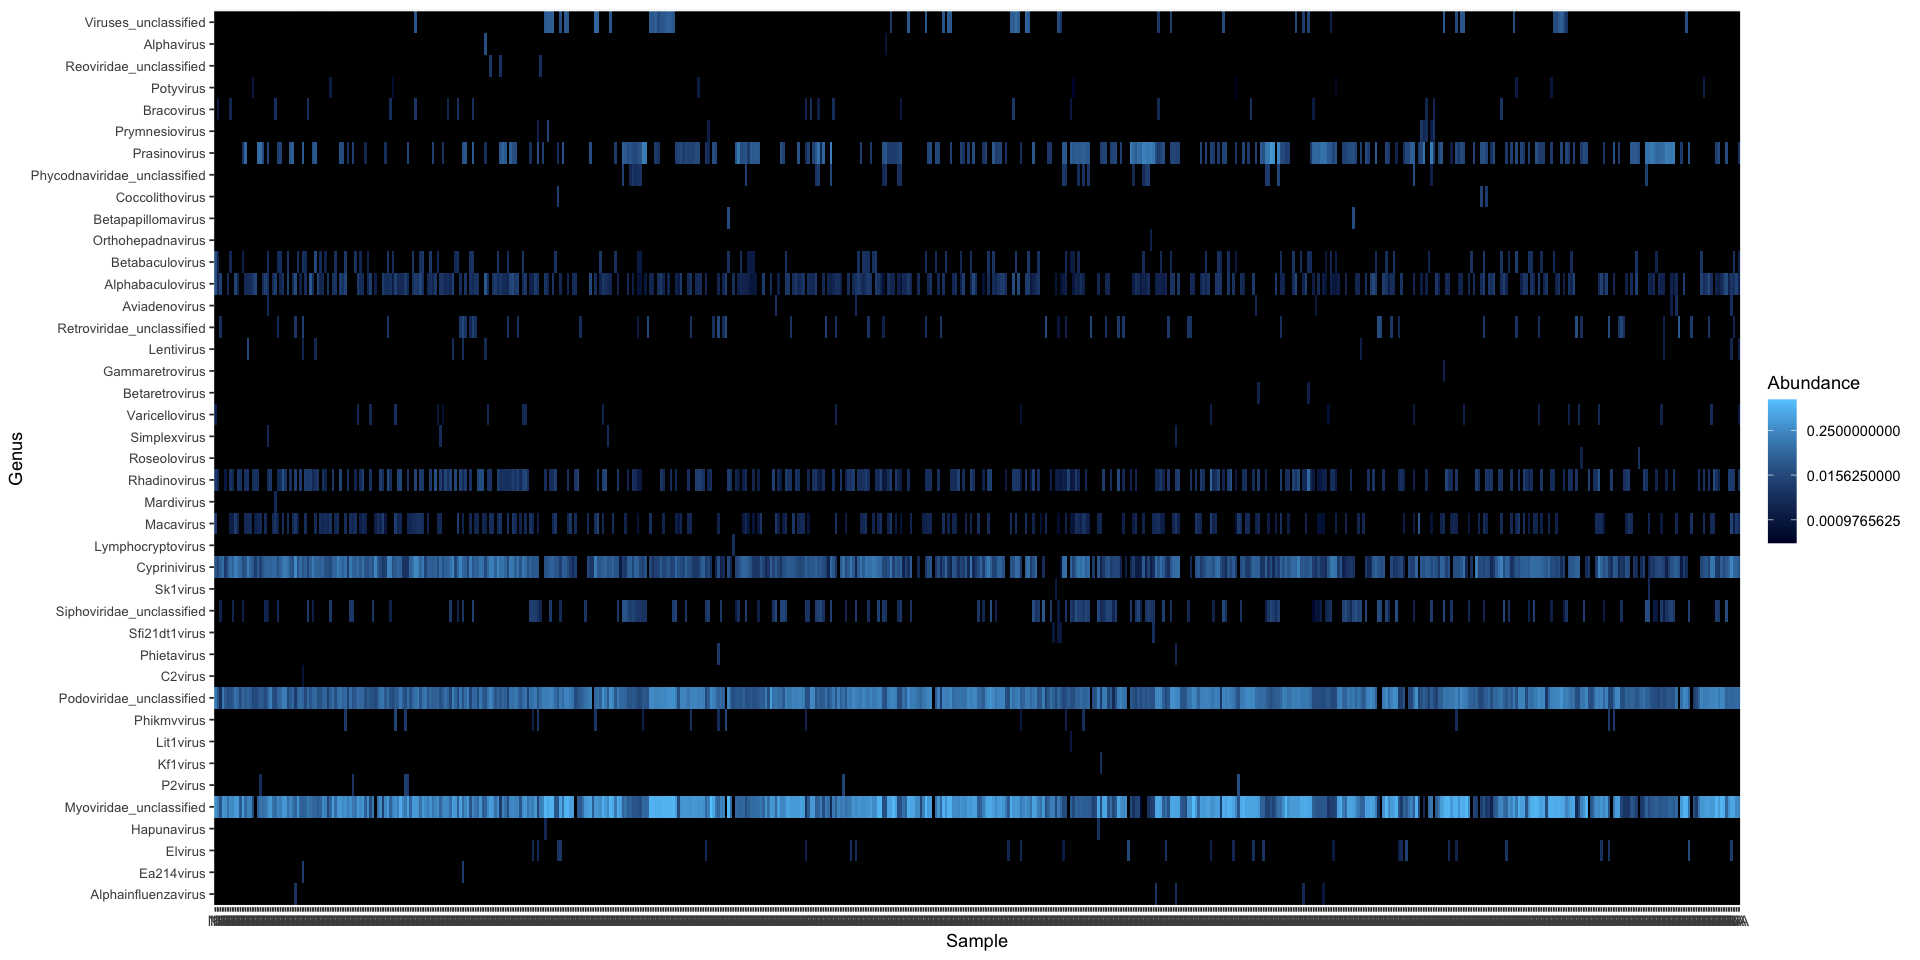

In [8]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.genus <- subset_taxa(ps.vir, is.na(Species) & !is.na(Genus))
ps.vir.genus

plot_heatmap(ps.vir.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_MetaPhlAn3_Viruses_by_Genus.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


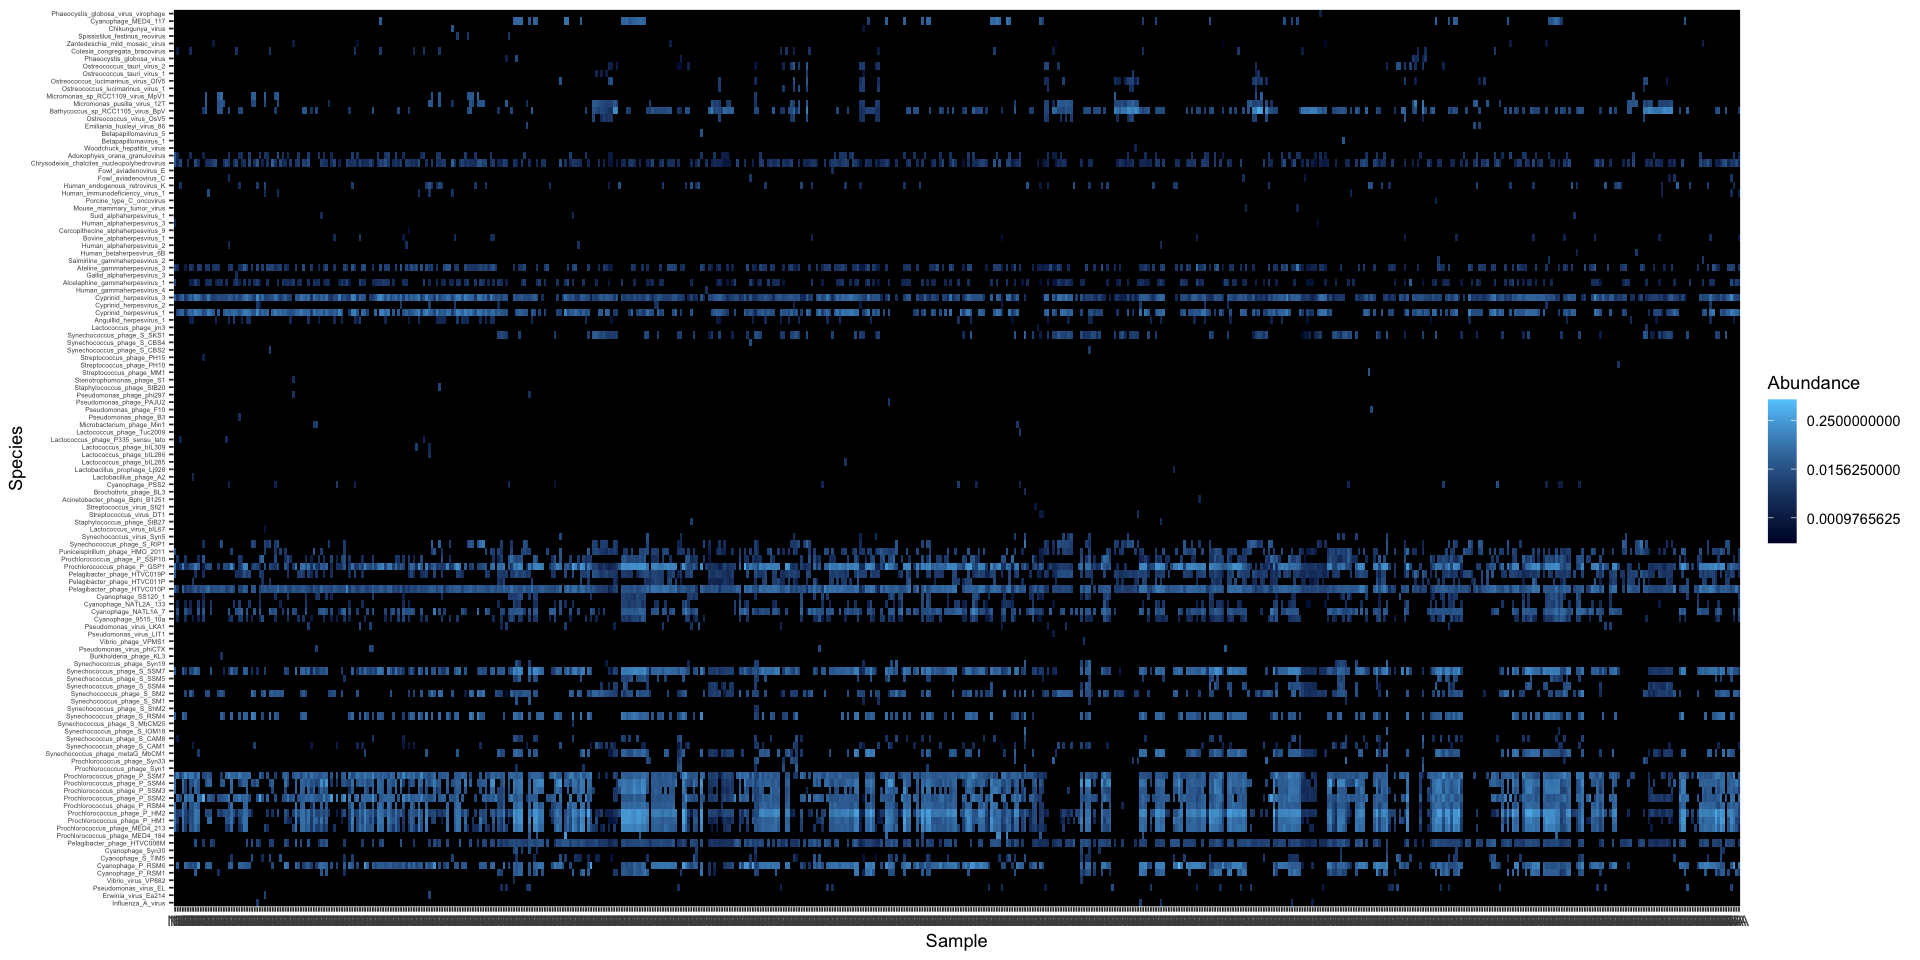

In [9]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.species <- subset_taxa(ps.vir, !is.na(Species))
ps.vir.species

plot_heatmap(ps.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 258 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 258 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 65 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 65 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


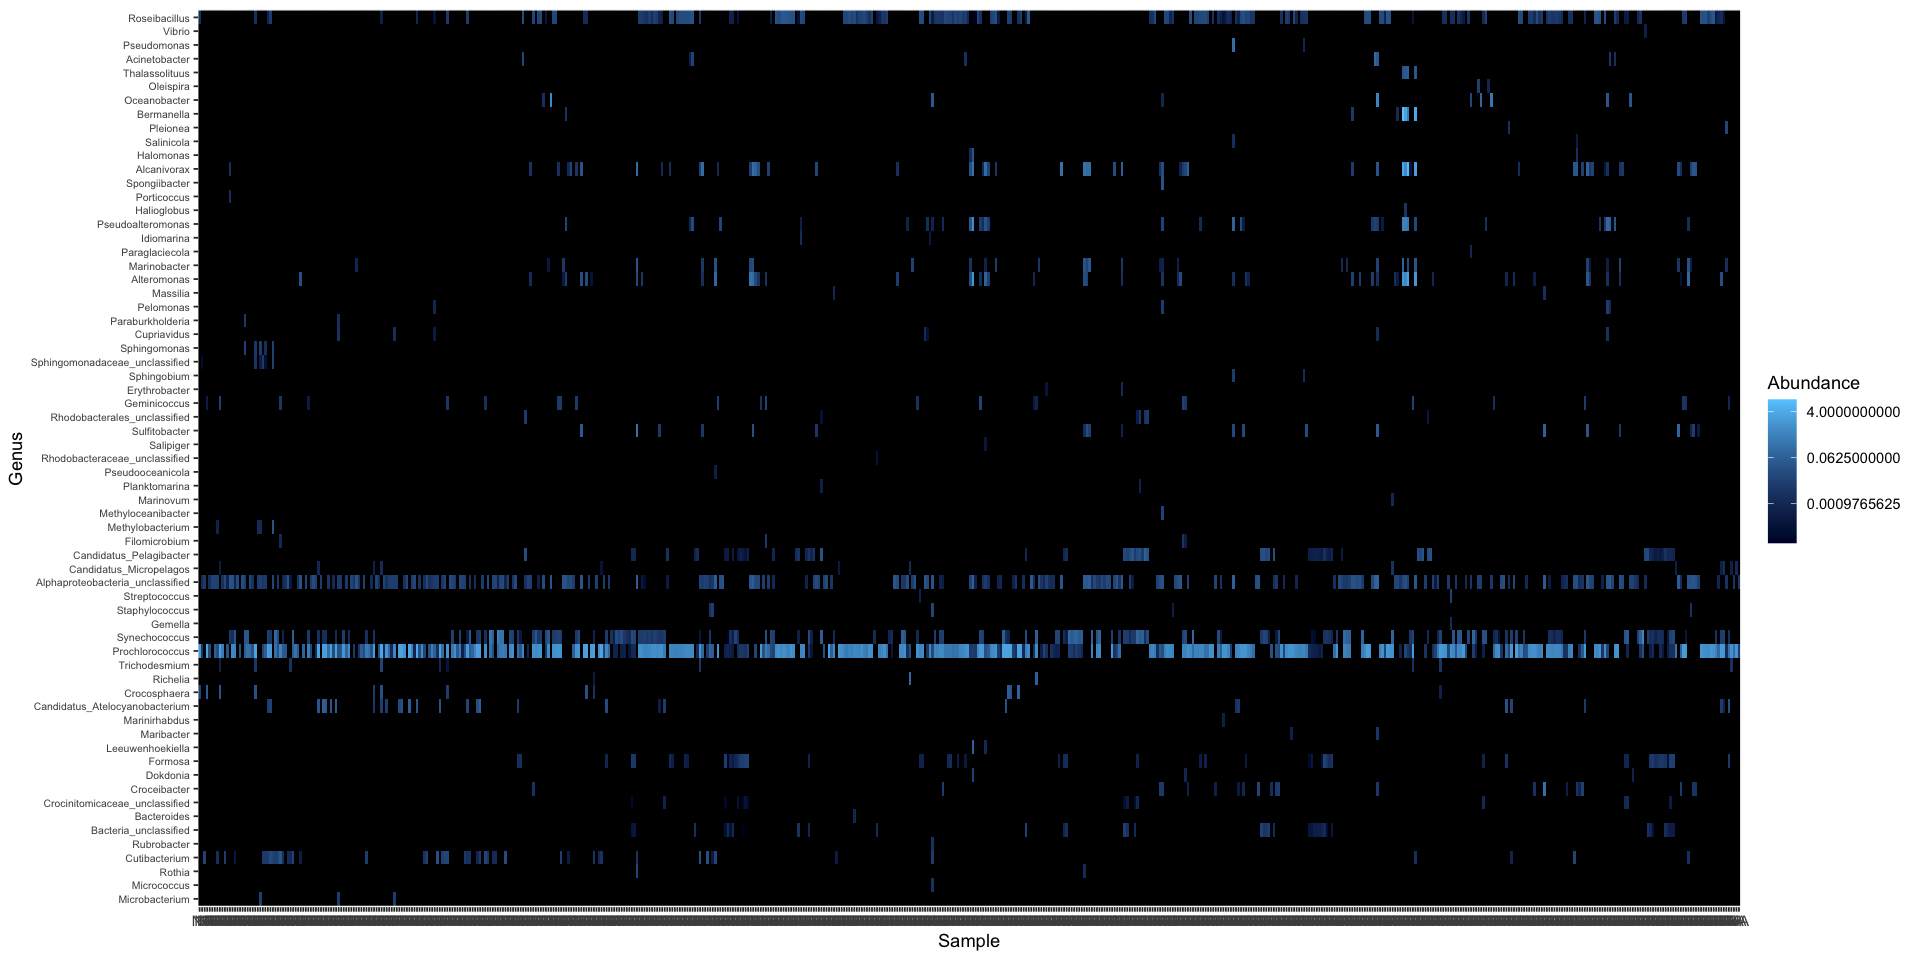

In [10]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.bac <- subset_taxa(ps, Kingdom == "Bacteria")
ps.bac

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bac.genus <- subset_taxa(ps.bac, is.na(Species) & !is.na(Genus))
ps.bac.genus

plot_heatmap(ps.bac.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))
ggsave(filename="BioGEOTRACES_MetaPhlAn3_Bacteria_by_Genus.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 258 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 258 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 106 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 106 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


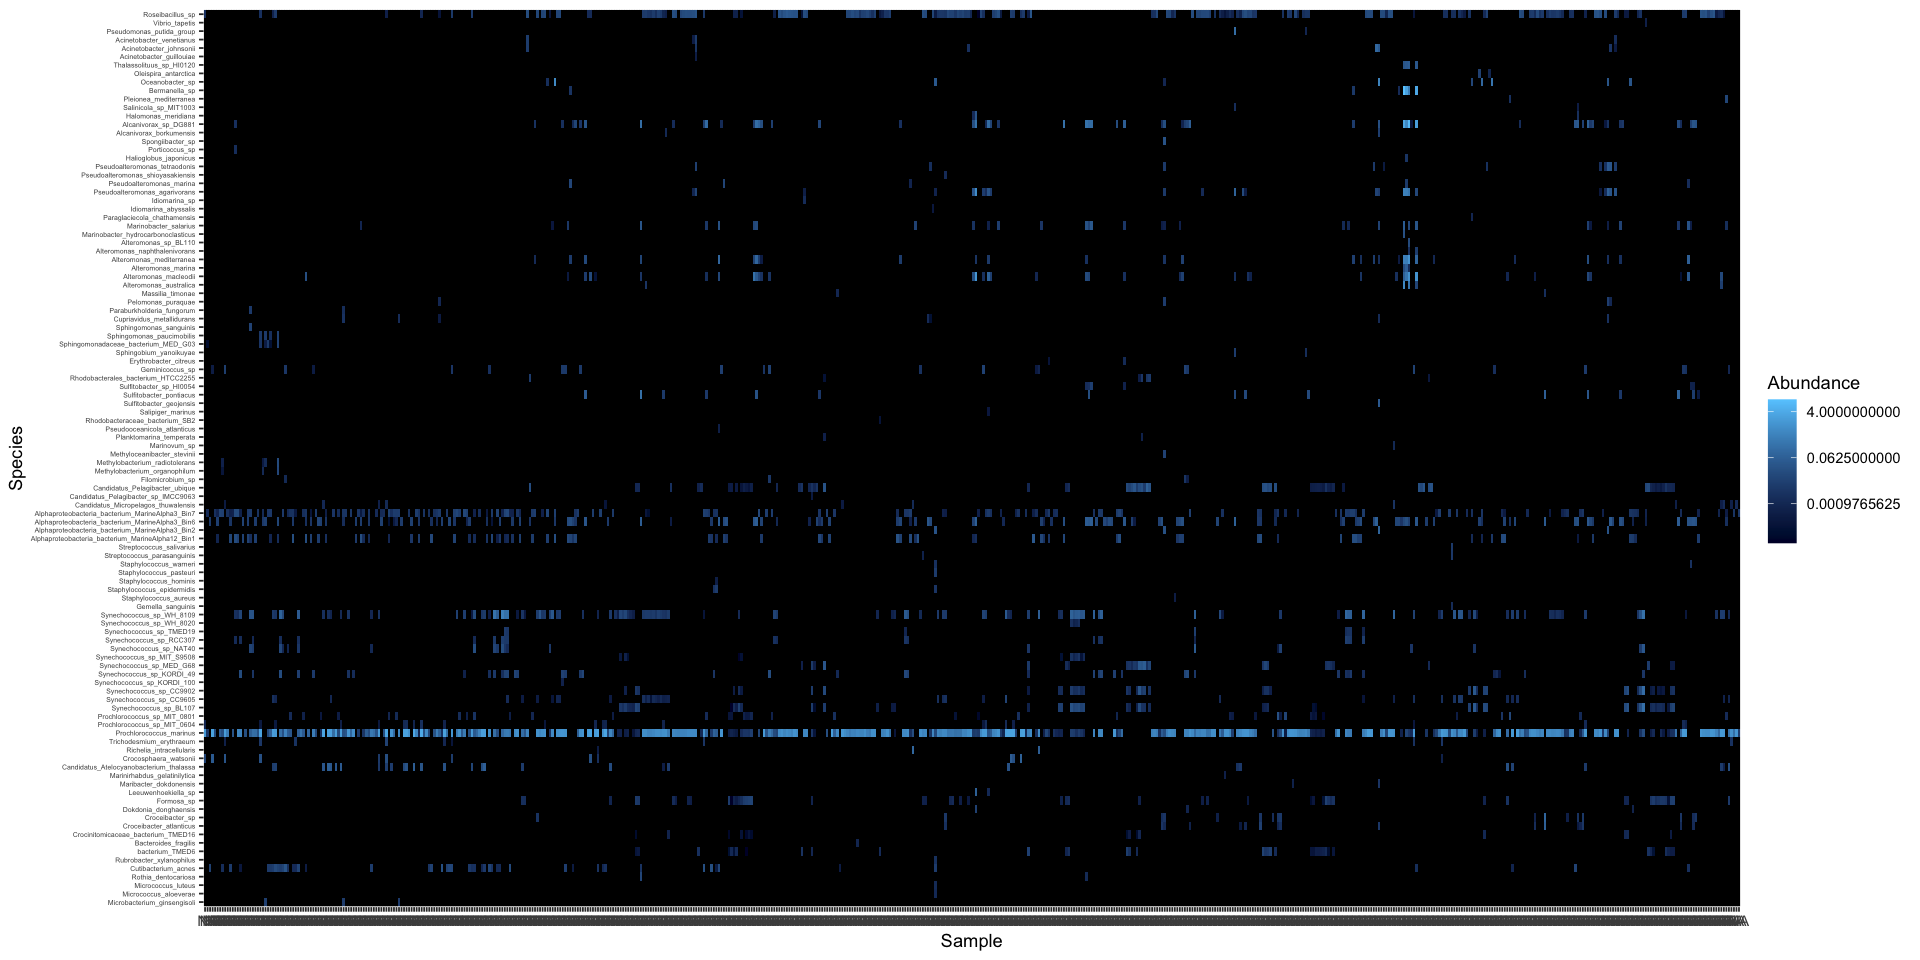

In [11]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.bac <- subset_taxa(ps, Kingdom == "Bacteria")
ps.bac

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bac.species <- subset_taxa(ps.bac, !is.na(Species))
ps.bac.species

plot_heatmap(ps.bac.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))
ggsave(filename="BioGEOTRACES_MetaPhlAn3_Bacteria_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 25 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


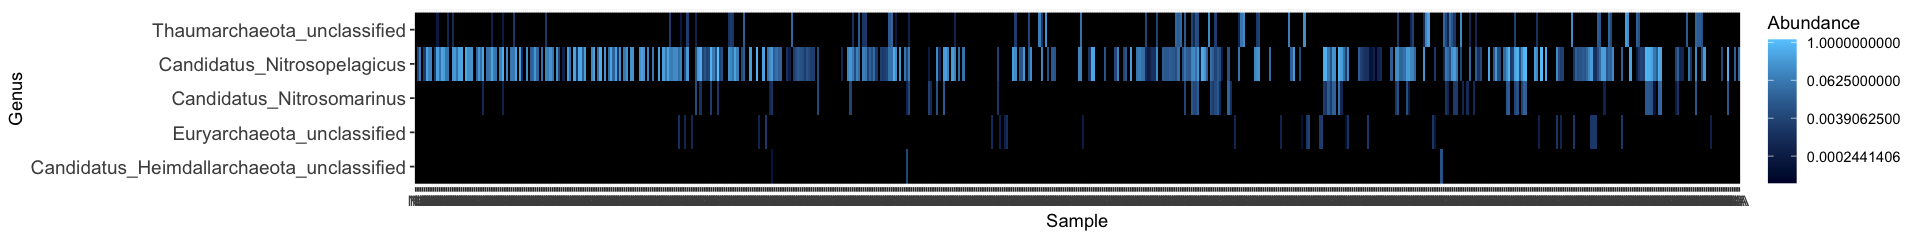

In [12]:
options(repr.plot.width=16, repr.plot.height=2)

# select all viruses
ps.arc <- subset_taxa(ps, Kingdom == "Archaea")
ps.arc

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.arc.genus <- subset_taxa(ps.arc, is.na(Species) & !is.na(Genus))
ps.arc.genus

plot_heatmap(ps.arc.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))
ggsave(filename="BioGEOTRACES_MetaPhlAn3_Archaea_by_Genus.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 50, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 25 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


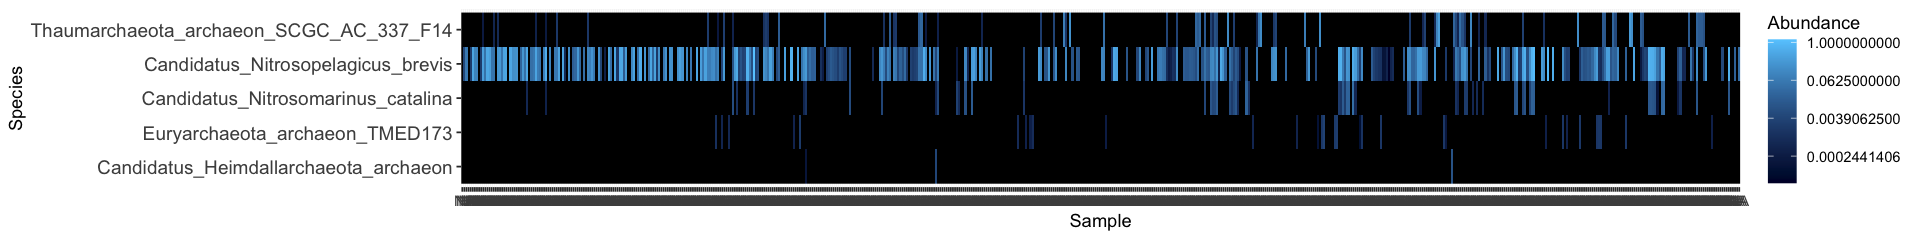

In [13]:
options(repr.plot.width=16, repr.plot.height=2)

# select all viruses
ps.arc <- subset_taxa(ps, Kingdom == "Archaea")
ps.arc

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.arc.species <- subset_taxa(ps.arc, !is.na(Species))
ps.arc.species

plot_heatmap(ps.arc.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))
ggsave(filename="BioGEOTRACES_MetaPhlAn3_Archaea_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 50, units = "mm",
       dpi = 300, limitsize = FALSE)

## Select HOT Samples

###  - prepare HOT metadata

In [14]:
#unique(HOT_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')

MonthRange_order <- c("12-5", "6-11")
DepthRange_order <- c("0-60", "61-125", "126-180")

HOT_metadata_df.long <- metadata_df %>% 
  filter(Cruise_Series == "HOT") %>%
  mutate(MonthRange = case_when(Collection_Month>=0 & Collection_Month<=5 | Collection_Month==12 ~ "12-5",
                                Collection_Month>=6 & Collection_Month<=11 ~ "6-11")) %>%
  mutate(MonthRange = factor(MonthRange, levels=MonthRange_order)) %>%
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  select(NCBI_SRA_Acc, Collection_Year, MonthRange, Month_Name, Depth, Year_Month) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>%
  mutate(DepthRange = factor(DepthRange, levels=DepthRange_order)) %>%
  select(NCBI_SRA_Acc, MonthRange, Year_Month, DepthRange)
head(HOT_metadata_df.long, 2)

,NCBI_SRA_Acc,MonthRange,Year_Month,DepthRange
,<chr>,<fct>,<fct>,<fct>
SRR5720299,SRR5720299,12-5,2004_2,0-60
SRR5720300,SRR5720300,12-5,2004_2,61-125


In [15]:
# order rows first by month range, then by depth range
rownames(HOT_metadata_df.long) <- HOT_metadata_df.long$NCBI_SRA_Acc
HOT_metadata_df.long <- HOT_metadata_df.long[order(HOT_metadata_df.long$MonthRange, HOT_metadata_df.long$DepthRange), ]
head(HOT_metadata_df.long, 2)

,NCBI_SRA_Acc,MonthRange,Year_Month,DepthRange
,<chr>,<fct>,<fct>,<fct>
SRR5720299,SRR5720299,12-5,2004_2,0-60
SRR5720302,SRR5720302,12-5,2004_4,0-60


### - slice HOT phyloseq object

In [16]:
ps.hot <- subset_samples(ps, Cruise_Series == "HOT")
ps.hot

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


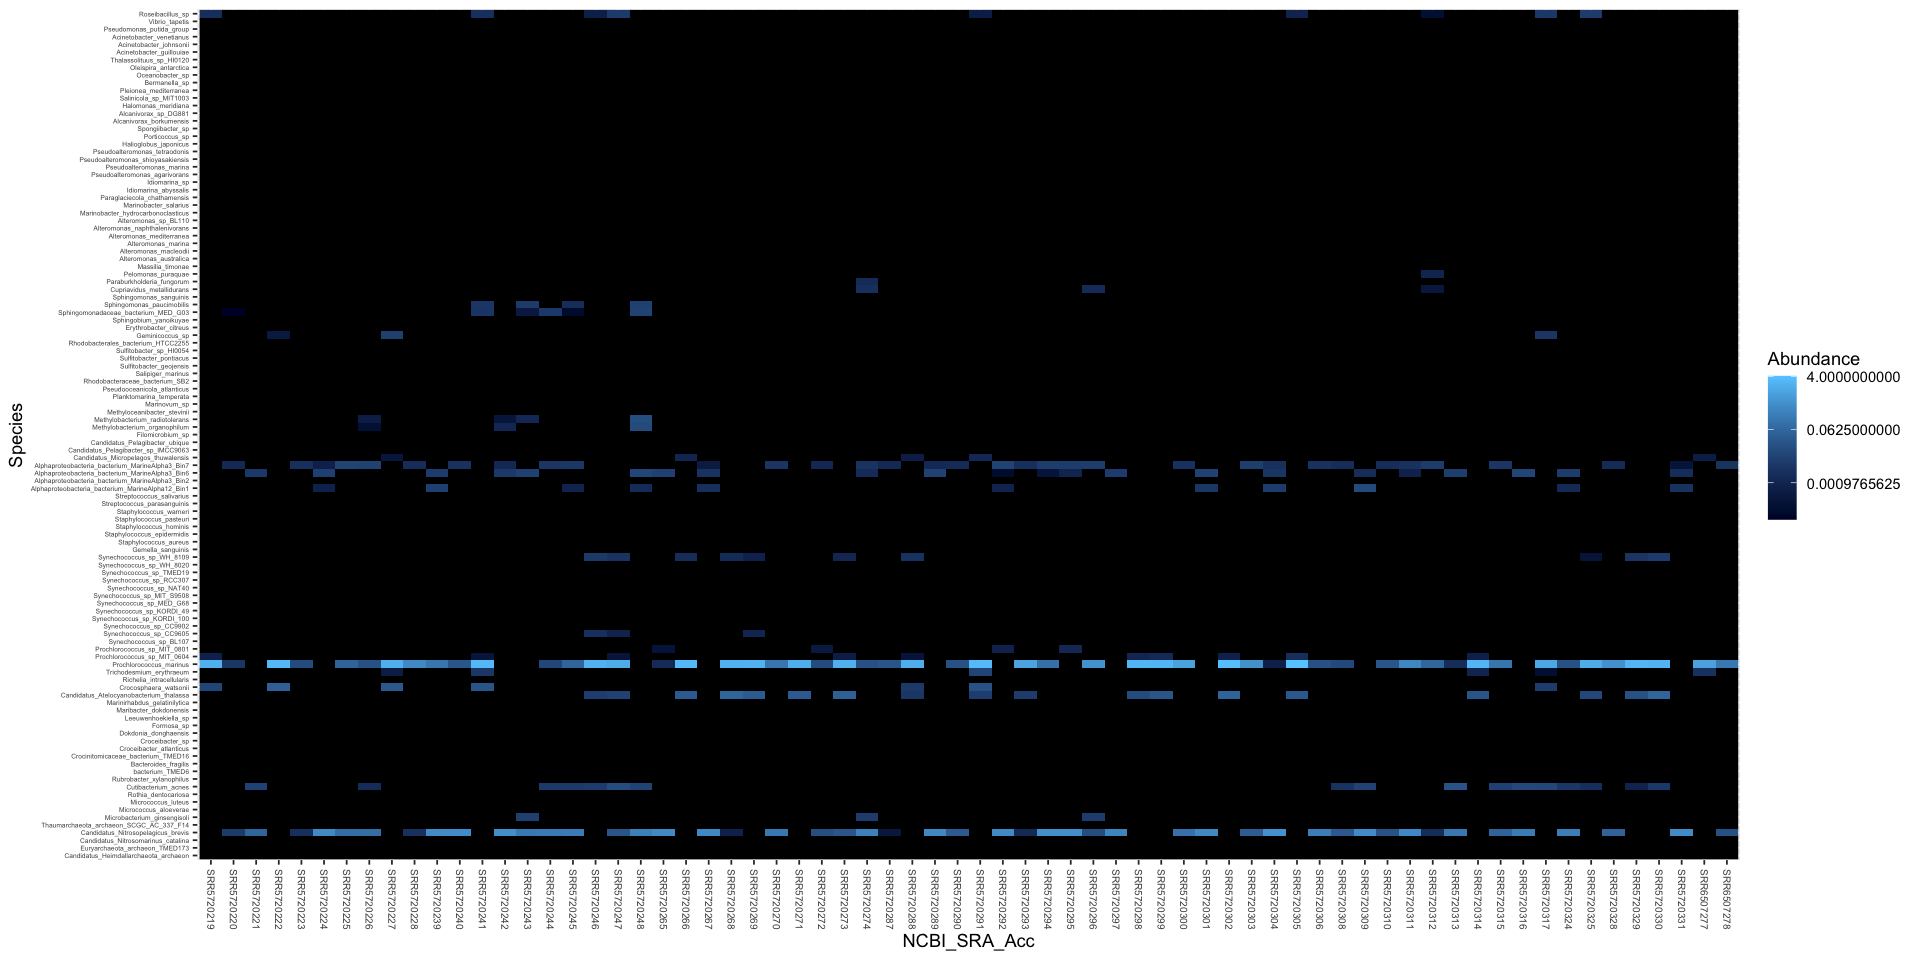

In [17]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.hot.pro <- subset_taxa(ps.hot, Kingdom %in% c("Bacteria", "Archaea"))
ps.hot.pro

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.hot.pro.species <- subset_taxa(ps.hot.pro, !is.na(Species))
ps.hot.pro.species

plot_heatmap(ps.hot.pro.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_HOT_MetaPhlAn3_Prokaryotes_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


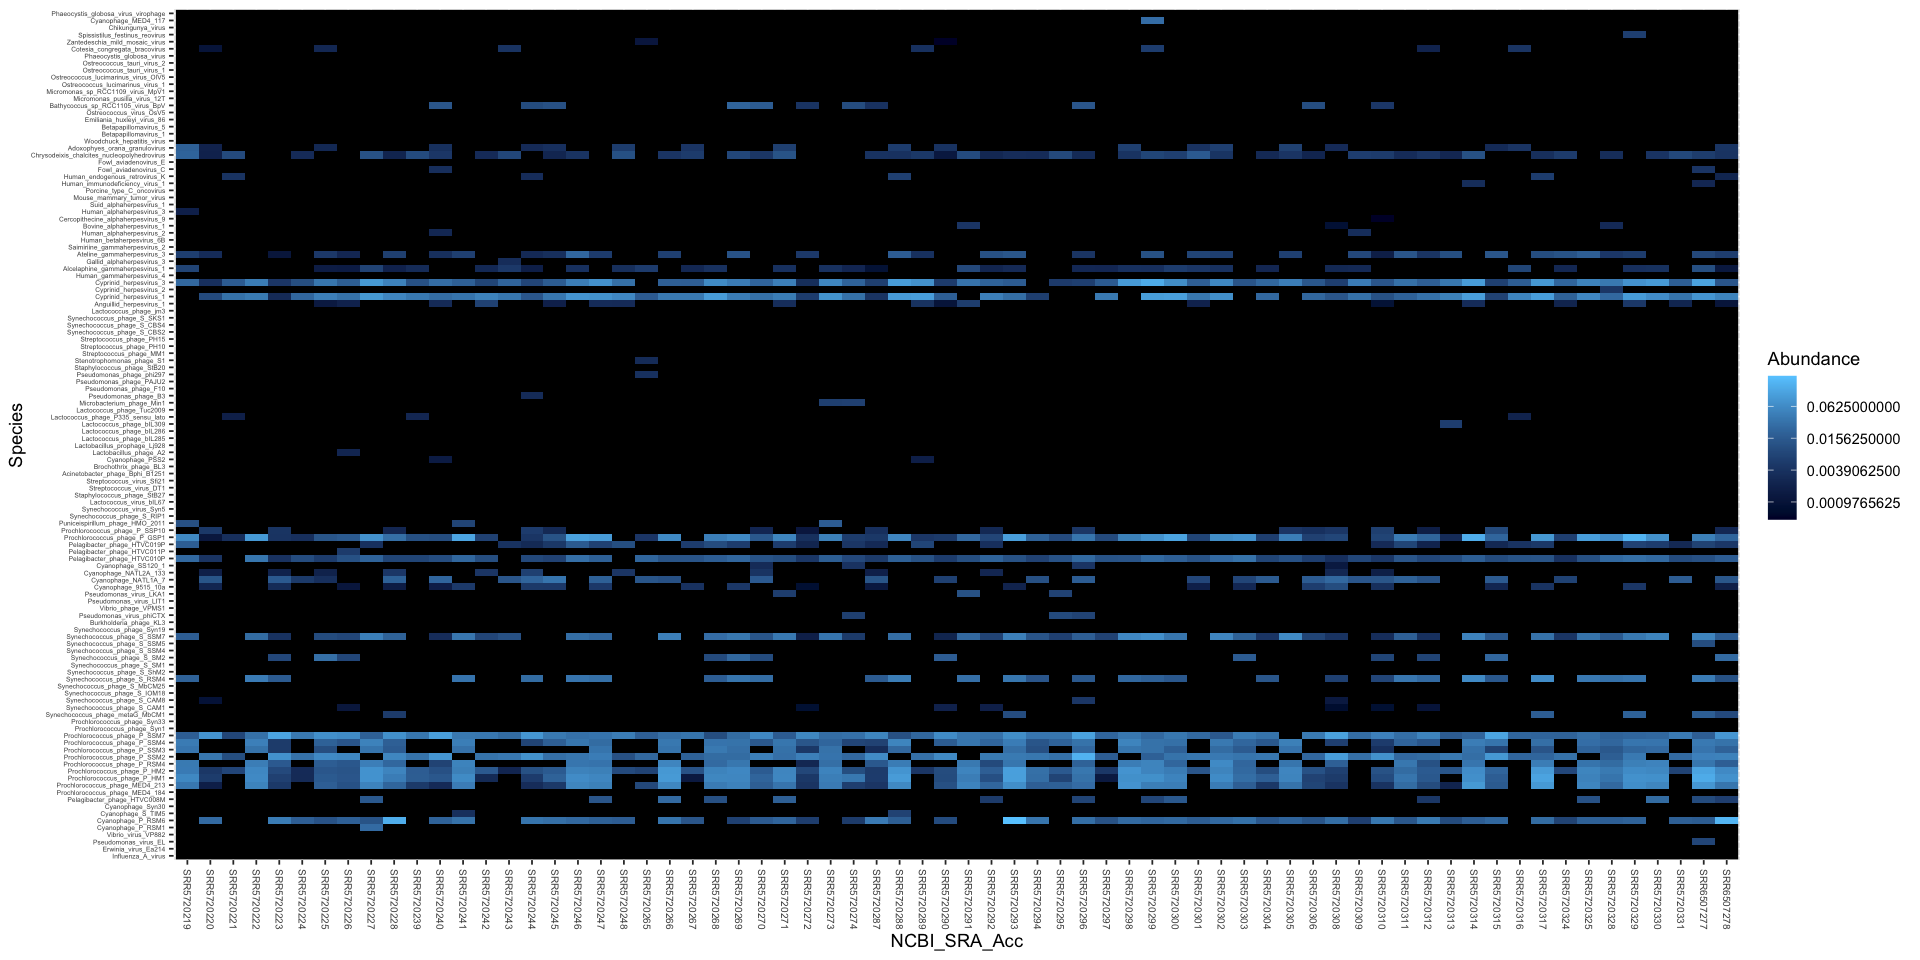

In [18]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.hot.vir <- subset_taxa(ps.hot, Kingdom == "Viruses")
ps.hot.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.hot.vir.species <- subset_taxa(ps.hot.vir, !is.na(Species))
ps.hot.vir.species

plot_heatmap(ps.hot.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_HOT_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

### - get HOT prokaryotes abundance table

In [19]:
# get HOT Prokaryotes abundance table
HOT_pro_species_abund <- t(otu_table(ps.hot.pro.species))
ncol(HOT_pro_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(HOT_pro_species_abund) >= 1e-6
HOT_pro_species_abund <- HOT_pro_species_abund[, keep_cols]
ncol(HOT_pro_species_abund)
head(HOT_pro_species_abund, 2)

[1] 111

[1] 24

,s__Candidatus_Nitrosopelagicus_brevis,s__Microbacterium_ginsengisoli,s__Cutibacterium_acnes,s__Candidatus_Atelocyanobacterium_thalassa,s__Crocosphaera_watsonii,s__Trichodesmium_erythraeum,s__Prochlorococcus_marinus,s__Prochlorococcus_sp_MIT_0604,s__Prochlorococcus_sp_MIT_0801,s__Synechococcus_sp_CC9605,⋯,s__Candidatus_Micropelagos_thuwalensis,s__Methylobacterium_organophilum,s__Methylobacterium_radiotolerans,s__Geminicoccus_sp,s__Sphingomonadaceae_bacterium_MED_G03,s__Sphingomonas_paucimobilis,s__Cupriavidus_metallidurans,s__Paraburkholderia_fungorum,s__Pelomonas_puraquae,s__Roseibacillus_sp
SRR6507278,0.01835311,0,0,0,0,0.000000000,0.1479083,0,0,0,⋯,0.0000000000,0,0,0,0,0,0,0,0,0
SRR6507277,0.00000000,0,0,0,0,0.002308706,1.0583343,0,0,0,⋯,0.0005008593,0,0,0,0,0,0,0,0,0


In [20]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(HOT_metadata_df.long)
HOT_pro_species_abund <- HOT_pro_species_abund[row_order, ]

pdf 
  2

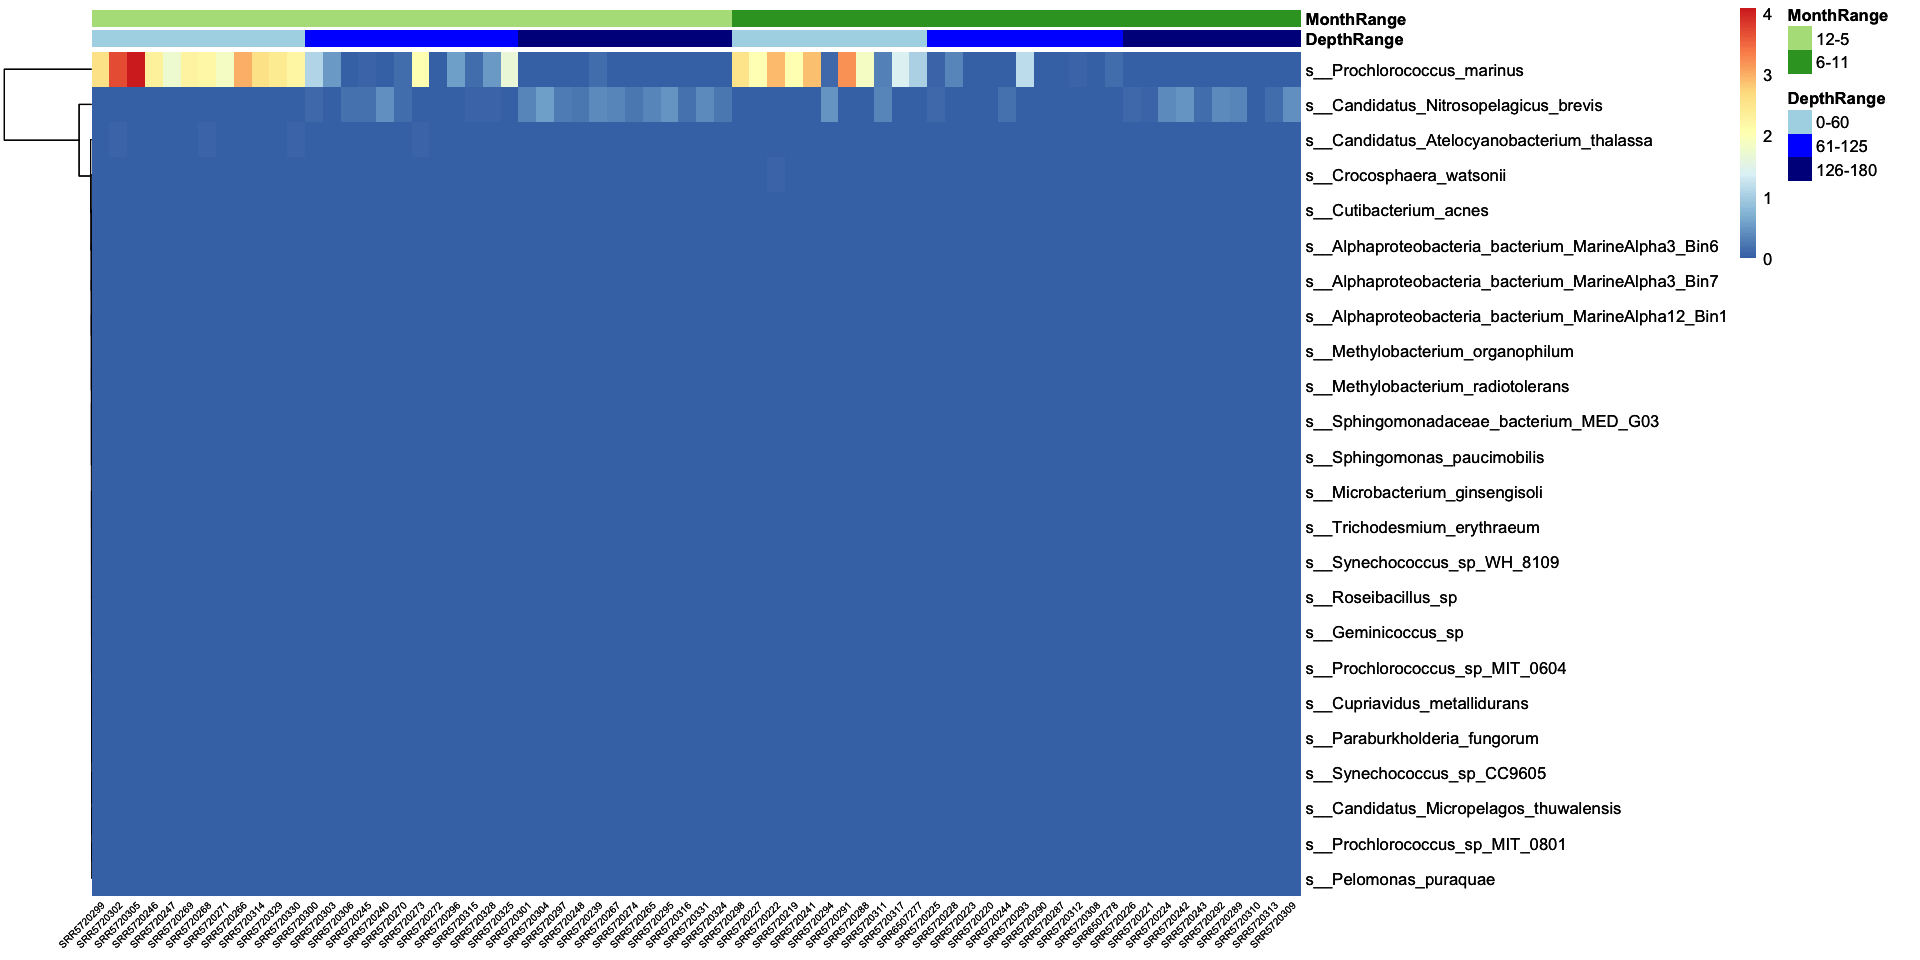

In [21]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

hot_sample_meta <- HOT_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.hot.pro <- pheatmap(t(HOT_pro_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = hot_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("12-5", "6-11"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_HOT_MetaPhlAn3_Prokaryotes_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.hot.pro)
dev.off()

print(pheat.hot.pro)

### - get HOT viruses abundance table

In [22]:
HOT_vir_species_abund <- t(otu_table(ps.hot.vir.species))
ncol(HOT_vir_species_abund)
# colnames(HOT_vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(HOT_vir_species_abund) >= 1e-6
HOT_vir_species_abund <- HOT_vir_species_abund[, keep_cols]

# remove columns of eukaryotic viruses
remove_cols <- c('s__Anguillid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_2', 
                 's__Cyprinid_herpesvirus_3',
                 's__Alcelaphine_gammaherpesvirus_1', 
                 's__Gallid_alphaherpesvirus_3',
                 's__Ateline_gammaherpesvirus_3',
                 's__Human_alphaherpesvirus_2',
                 's__Bovine_alphaherpesvirus_1',
                 's__Cercopithecine_alphaherpesvirus_9',
                 's__Human_alphaherpesvirus_3',
                 's__Human_immunodeficiency_virus_1',
                 's__Human_endogenous_retrovirus_K',
                 's__Fowl_aviadenovirus_C',
                 's__Chrysodeixis_chalcites_nucleopolyhedrovirus',
                 's__Adoxophyes_orana_granulovirus',
                 's__Cotesia_congregata_bracovirus',
                 's__Zantedeschia_mild_mosaic_virus',
                 's__Spissistilus_festinus_reovirus')
HOT_vir_species_abund <- HOT_vir_species_abund[, -which(colnames(HOT_vir_species_abund) %in% remove_cols)]
ncol(HOT_vir_species_abund)
head(HOT_vir_species_abund, 2)

[1] 120

[1] 42

,s__Pseudomonas_virus_EL,s__Cyanophage_P_RSM1,s__Cyanophage_P_RSM6,s__Cyanophage_S_TIM5,s__Pelagibacter_phage_HTVC008M,s__Prochlorococcus_phage_MED4_213,s__Prochlorococcus_phage_P_HM1,s__Prochlorococcus_phage_P_HM2,s__Prochlorococcus_phage_P_RSM4,s__Prochlorococcus_phage_P_SSM2,⋯,s__Cyanophage_PSS2,s__Lactobacillus_phage_A2,s__Lactococcus_phage_P335_sensu_lato,s__Lactococcus_phage_bIL309,s__Microbacterium_phage_Min1,s__Pseudomonas_phage_B3,s__Pseudomonas_phage_phi297,s__Stenotrophomonas_phage_S1,s__Bathycoccus_sp_RCC1105_virus_BpV,s__Cyanophage_MED4_117
SRR6507278,0.000000000,0,0.18186516,0,0.006249363,0.03448036,0.07434829,0.06035959,0.01791353,0.04892582,⋯,0,0,0,0,0,0,0,0,0,0
SRR6507277,0.008024108,0,0.01664047,0,0.009556543,0.08511603,0.14304917,0.11991804,0.03529779,0.04832480,⋯,0,0,0,0,0,0,0,0,0,0


In [23]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(HOT_metadata_df.long)
HOT_vir_species_abund <- HOT_vir_species_abund[row_order, ]

In [24]:
#HOT_vir_species_abund_meta <- merge(HOT_metadata_df.long, HOT_vir_species_abund, by="row.names")
#rownames(HOT_vir_species_abund_meta) <- HOT_vir_species_abund_meta$Row.names
#HOT_vir_species_abund_meta <- HOT_vir_species_abund_meta[, -1]
#head(HOT_vir_species_abund_meta, 2)

pdf 
  2

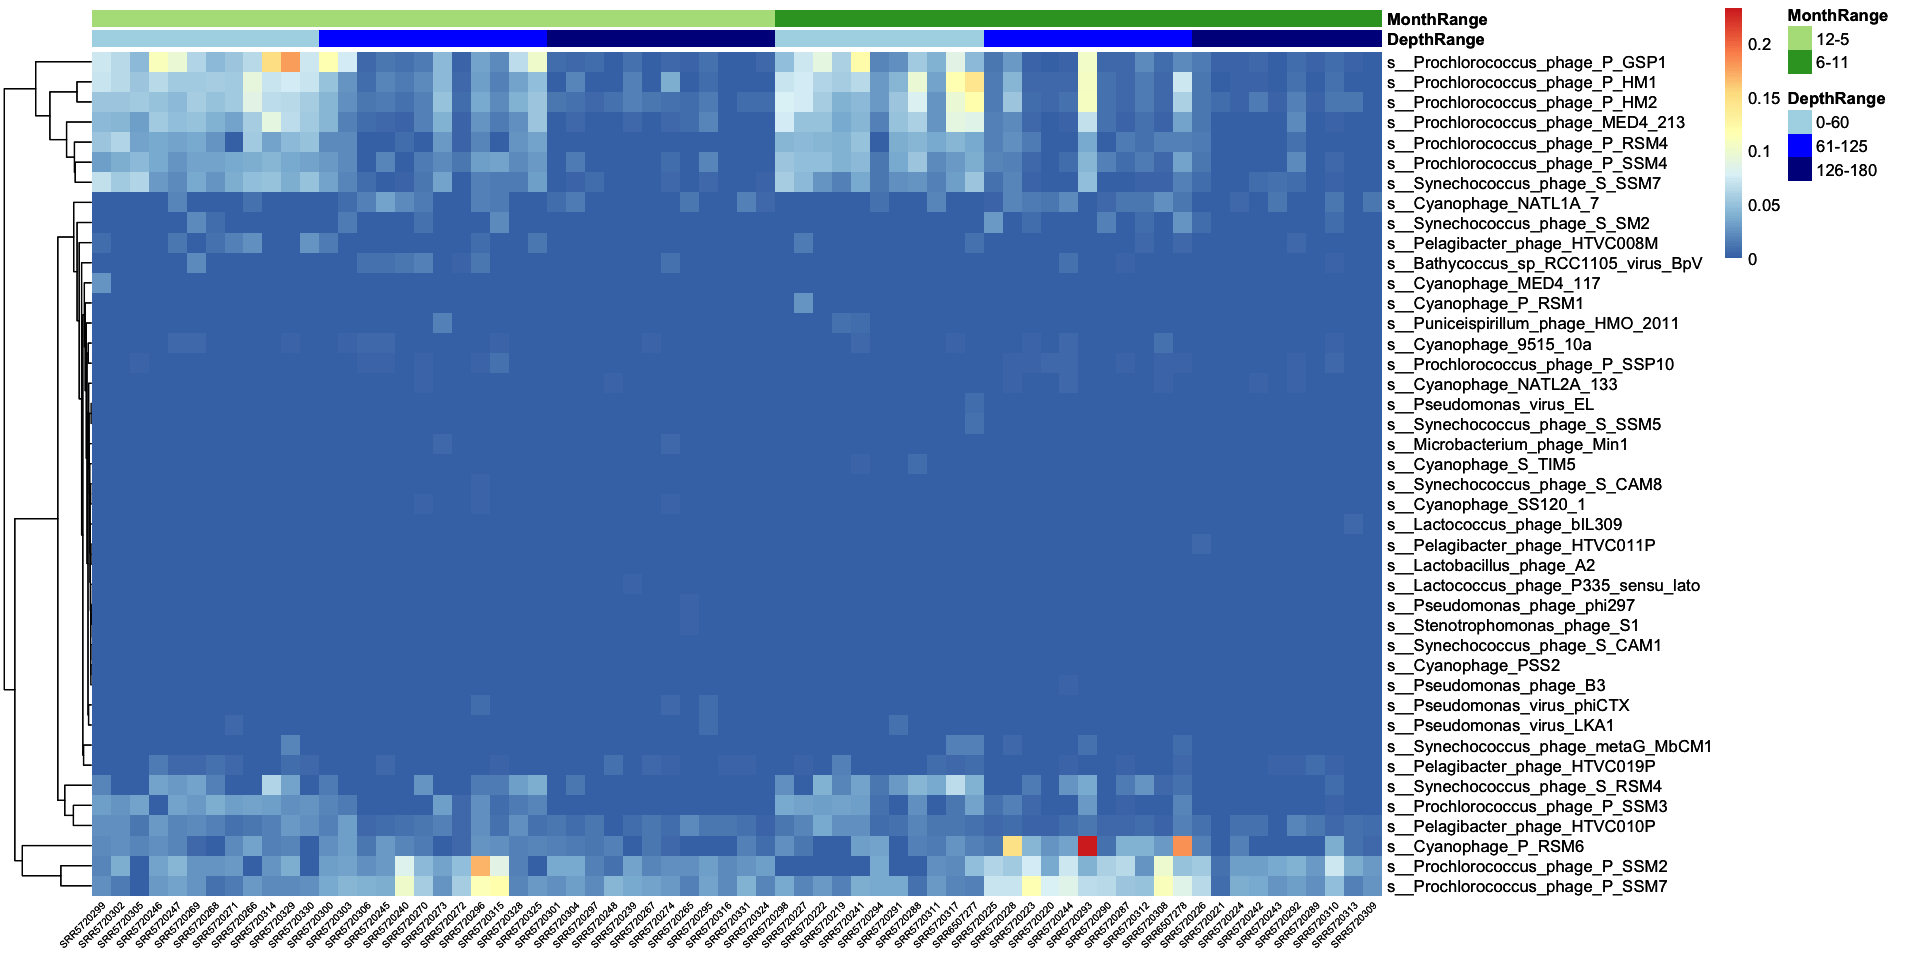

In [26]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

hot_sample_meta <- HOT_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.hot.vir <- pheatmap(t(HOT_vir_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = hot_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("12-5", "6-11"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_HOT_MetaPhlAn3_Viruses_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.hot.vir)
dev.off()

print(pheat.hot.vir)

## Select BATS Samples

###  - prepare BATS metadata

In [27]:
#unique(BATS_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')

MonthRange_order <- c("12-5", "6-11")
DepthRange_order <- c("0-60", "61-125", "126-180")

BATS_metadata_df.long <- metadata_df %>% 
  filter(Cruise_Series == "BATS") %>%
  mutate(MonthRange = case_when(Collection_Month>=0 & Collection_Month<=5 | Collection_Month==12 ~ "12-5",
                                Collection_Month>=6 & Collection_Month<=11 ~ "6-11")) %>%
  mutate(MonthRange = factor(MonthRange, levels=MonthRange_order)) %>%
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  select(NCBI_SRA_Acc, Collection_Year, MonthRange, Month_Name, Depth, Year_Month) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=DepthRange_order)) %>%
  select(NCBI_SRA_Acc, MonthRange, Year_Month, DepthRange)
head(BATS_metadata_df.long, 2)

,NCBI_SRA_Acc,MonthRange,Year_Month,DepthRange
,<chr>,<fct>,<fct>,<fct>
SRR5720327,SRR5720327,12-5,2003_4,0-60
SRR5720326,SRR5720326,12-5,2003_4,61-125


In [28]:
# order rows first by month range, then by depth range
rownames(BATS_metadata_df.long) <- BATS_metadata_df.long$NCBI_SRA_Acc
BATS_metadata_df.long <- BATS_metadata_df.long[order(BATS_metadata_df.long$MonthRange, BATS_metadata_df.long$DepthRange), ]
head(BATS_metadata_df.long, 2)

,NCBI_SRA_Acc,MonthRange,Year_Month,DepthRange
,<chr>,<fct>,<fct>,<fct>
SRR5720327,SRR5720327,12-5,2003_4,0-60
SRR5720338,SRR5720338,12-5,NA,0-60


### - slice BATS phyloseq object

In [29]:
ps.bats <- subset_samples(ps, Cruise_Series == "BATS")
ps.bats

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


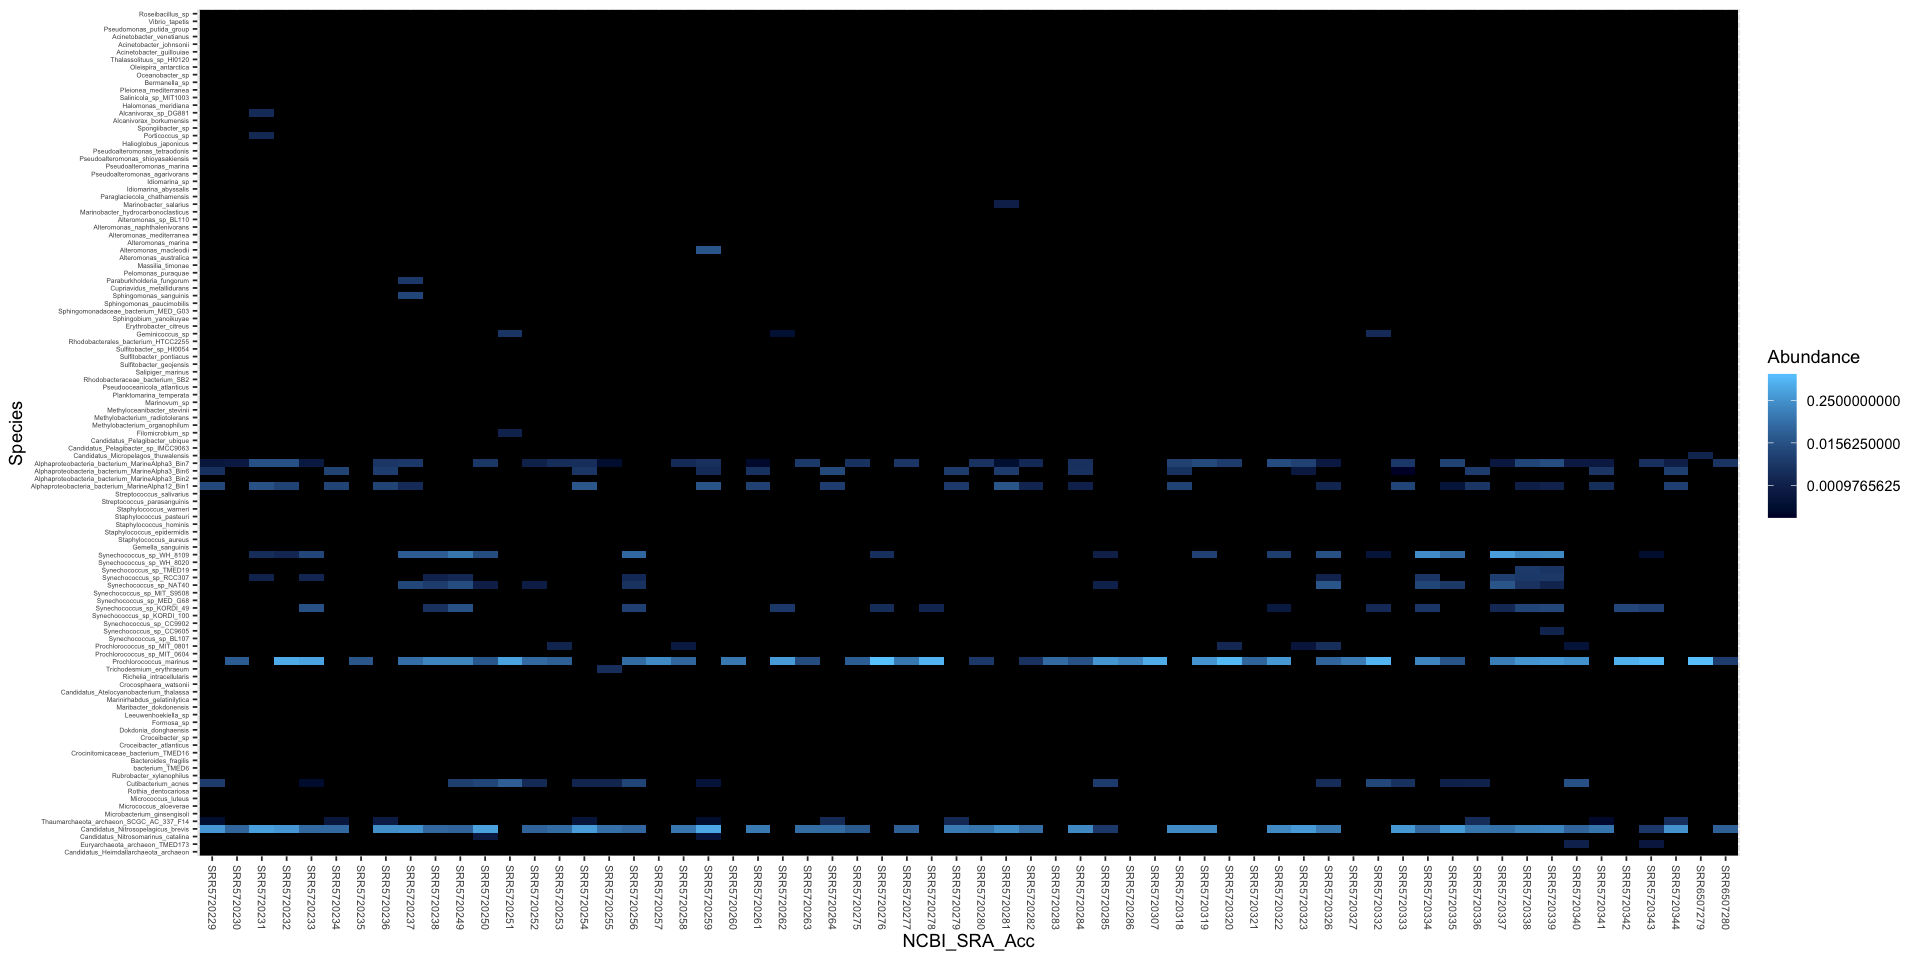

In [30]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.bats.pro <- subset_taxa(ps.bats, Kingdom %in% c("Bacteria", "Archaea"))
ps.bats.pro

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bats.pro.species <- subset_taxa(ps.bats.pro, !is.na(Species))
ps.bats.pro.species

plot_heatmap(ps.bats.pro.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_BATS_MetaPhlAn3_Prokaryotes_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


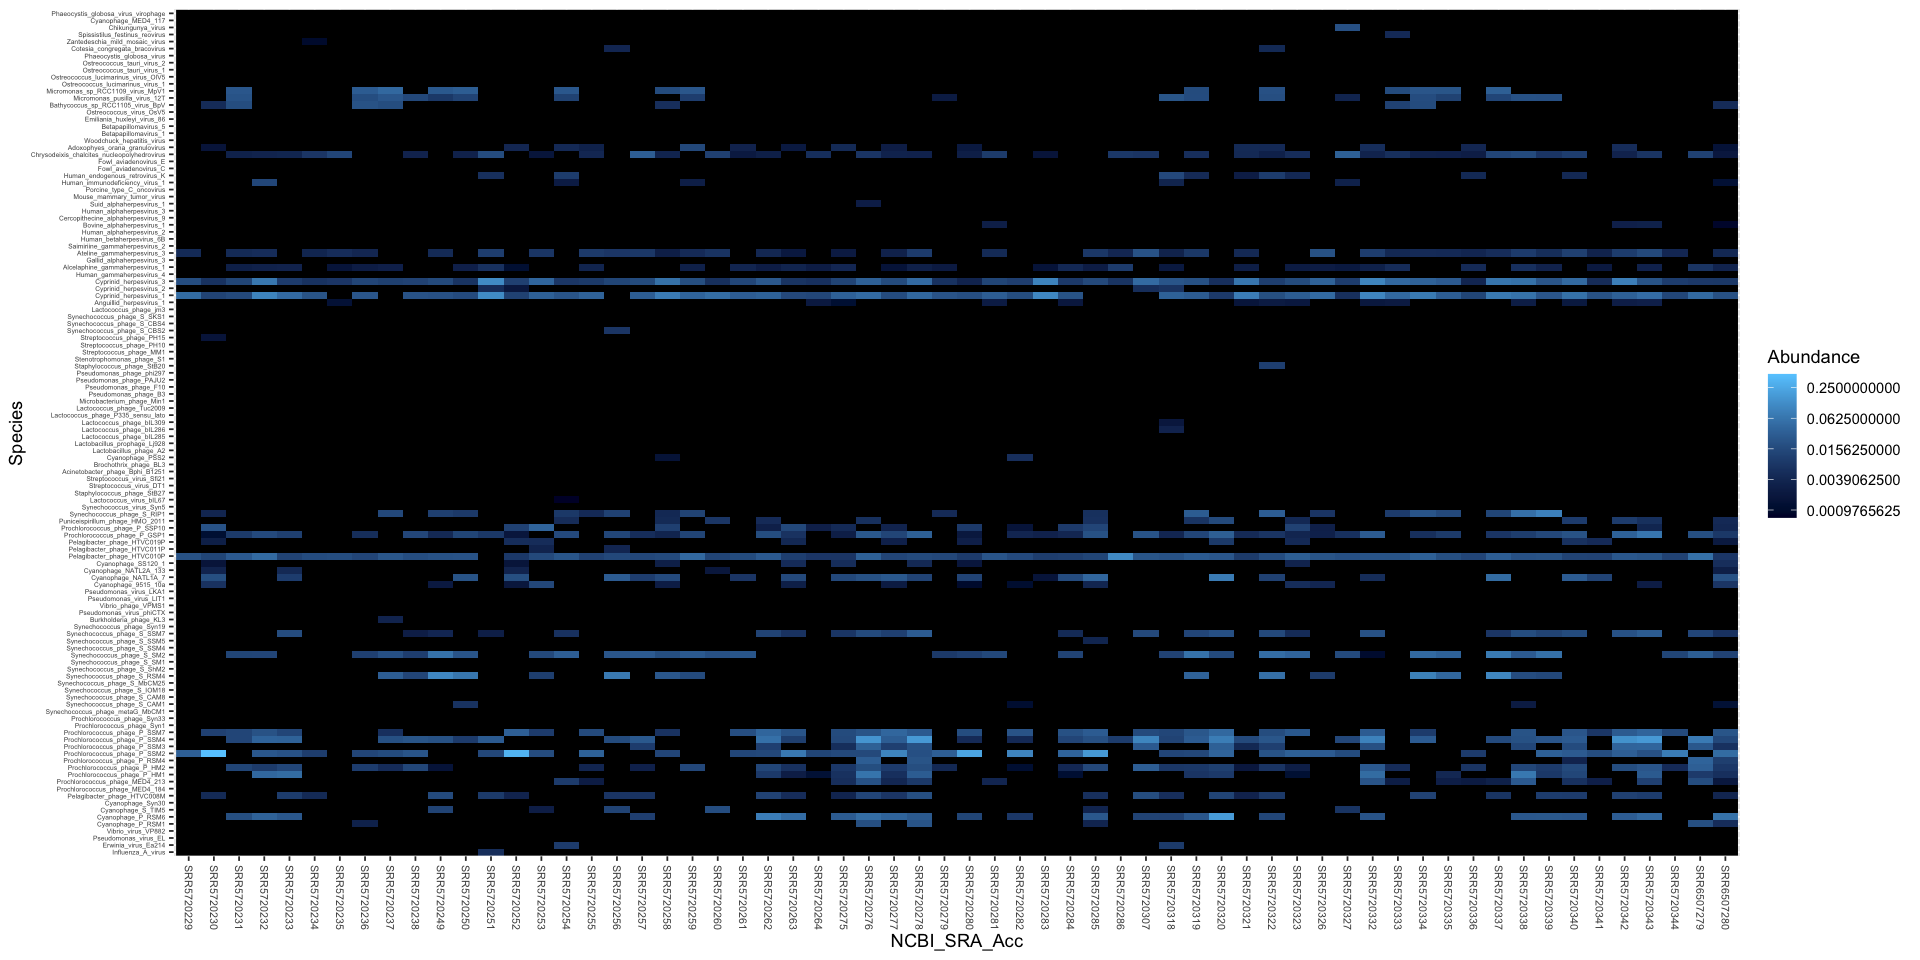

In [31]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.bats.vir <- subset_taxa(ps.bats, Kingdom == "Viruses")
ps.bats.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bats.vir.species <- subset_taxa(ps.bats.vir, !is.na(Species))
ps.bats.vir.species

plot_heatmap(ps.bats.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_BATS_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

### - get BATS prokaryotes abundance table

In [32]:
# get BATS Prokaryotes abundance table
BATS_pro_species_abund <- t(otu_table(ps.bats.pro.species))
ncol(BATS_pro_species_abund)
# colnames(BATS_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(BATS_pro_species_abund) >= 1e-6
BATS_pro_species_abund <- BATS_pro_species_abund[, keep_cols]
ncol(BATS_pro_species_abund)
head(BATS_pro_species_abund, 2)

[1] 111

[1] 26

,s__Euryarchaeota_archaeon_TMED173,s__Candidatus_Nitrosomarinus_catalina,s__Candidatus_Nitrosopelagicus_brevis,s__Thaumarchaeota_archaeon_SCGC_AC_337_F14,s__Cutibacterium_acnes,s__Trichodesmium_erythraeum,s__Prochlorococcus_marinus,s__Prochlorococcus_sp_MIT_0801,s__Synechococcus_sp_CC9605,s__Synechococcus_sp_KORDI_49,⋯,s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin7,s__Candidatus_Micropelagos_thuwalensis,s__Filomicrobium_sp,s__Geminicoccus_sp,s__Sphingomonas_sanguinis,s__Paraburkholderia_fungorum,s__Alteromonas_macleodii,s__Marinobacter_salarius,s__Porticoccus_sp,s__Alcanivorax_sp_DG881
SRR6507280,0,0,0.03269634,0,0,0,0.005118657,0,0,0,⋯,0.003304635,0.000000000,0,0,0,0,0,0,0,0
SRR6507279,0,0,0.00000000,0,0,0,1.342974840,0,0,0,⋯,0.000000000,0.001243065,0,0,0,0,0,0,0,0


In [33]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(BATS_metadata_df.long)
BATS_pro_species_abund <- BATS_pro_species_abund[row_order, ]

pdf 
  2

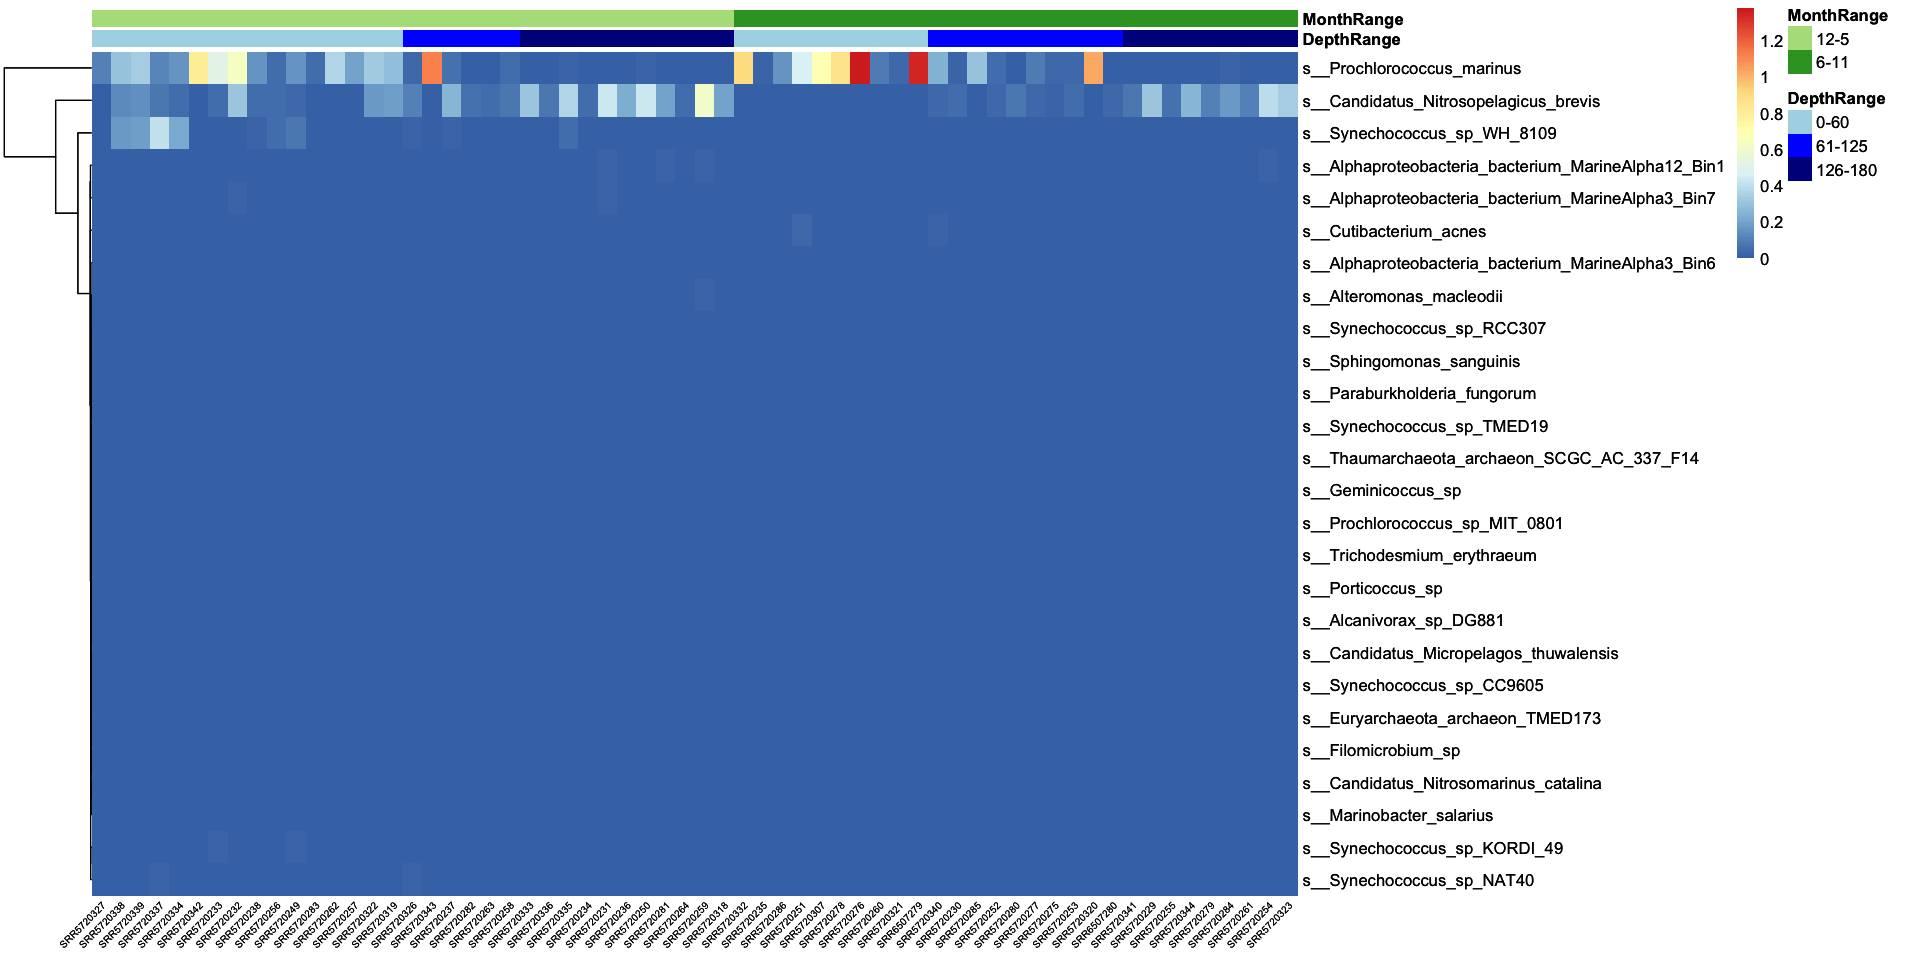

In [35]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

bats_sample_meta <- BATS_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.bats.pro <- pheatmap(t(BATS_pro_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = bats_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("12-5", "6-11"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_BATS_MetaPhlAn3_Prokaryotes_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.bats.pro)
dev.off()

print(pheat.bats.pro)

### - get BATS viruses abundance table

In [36]:
BATS_vir_species_abund <- t(otu_table(ps.bats.vir.species))
ncol(BATS_vir_species_abund)
# colnames(BATS_vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(BATS_vir_species_abund) >= 1e-6
BATS_vir_species_abund <- BATS_vir_species_abund[, keep_cols]

# remove columns of eukaryotic viruses
remove_cols <- c('s__Influenza_A_virus',
                 's__Suid_alphaherpesvirus_1',
                 's__Chikungunya_virus',
                 's__Anguillid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_2', 
                 's__Cyprinid_herpesvirus_3',
                 's__Alcelaphine_gammaherpesvirus_1', 
                 's__Gallid_alphaherpesvirus_3',
                 's__Ateline_gammaherpesvirus_3',
                 's__Human_alphaherpesvirus_2',
                 's__Bovine_alphaherpesvirus_1',
                 's__Cercopithecine_alphaherpesvirus_9',
                 's__Human_alphaherpesvirus_3',
                 's__Human_immunodeficiency_virus_1',
                 's__Human_endogenous_retrovirus_K',
                 's__Fowl_aviadenovirus_C',
                 's__Chrysodeixis_chalcites_nucleopolyhedrovirus',
                 's__Adoxophyes_orana_granulovirus',
                 's__Cotesia_congregata_bracovirus',
                 's__Zantedeschia_mild_mosaic_virus',
                 's__Spissistilus_festinus_reovirus')
BATS_vir_species_abund <- BATS_vir_species_abund[, -which(colnames(BATS_vir_species_abund) %in% remove_cols)]
ncol(BATS_vir_species_abund)
head(BATS_vir_species_abund, 2)

[1] 120

[1] 40

,s__Erwinia_virus_Ea214,s__Cyanophage_P_RSM1,s__Cyanophage_P_RSM6,s__Cyanophage_S_TIM5,s__Pelagibacter_phage_HTVC008M,s__Prochlorococcus_phage_MED4_213,s__Prochlorococcus_phage_P_HM1,s__Prochlorococcus_phage_P_HM2,s__Prochlorococcus_phage_P_RSM4,s__Prochlorococcus_phage_P_SSM2,⋯,s__Lactococcus_virus_bIL67,s__Cyanophage_PSS2,s__Lactococcus_phage_bIL286,s__Lactococcus_phage_bIL309,s__Staphylococcus_phage_StB20,s__Streptococcus_phage_PH15,s__Synechococcus_phage_S_CBS2,s__Bathycoccus_sp_RCC1105_virus_BpV,s__Micromonas_pusilla_virus_12T,s__Micromonas_sp_RCC1109_virus_MpV1
SRR6507280,0,0.005081844,0.05778194,0,0.00372178,0.001920383,0.005908225,0.00806158,0.01070145,0.04800873,⋯,0,0,0,0,0,0,0,0.004839863,0,0
SRR6507279,0,0.018783255,0.00000000,0,0.00000000,0.017673626,0.008942267,0.03256924,0.03720538,0.00000000,⋯,0,0,0,0,0,0,0,0.000000000,0,0


In [37]:
# order rows according to metadata based on MonthRange and DepthRange
BATS_vir_species_abund <- BATS_vir_species_abund[rownames(BATS_metadata_df.long), ]

pdf 
  2

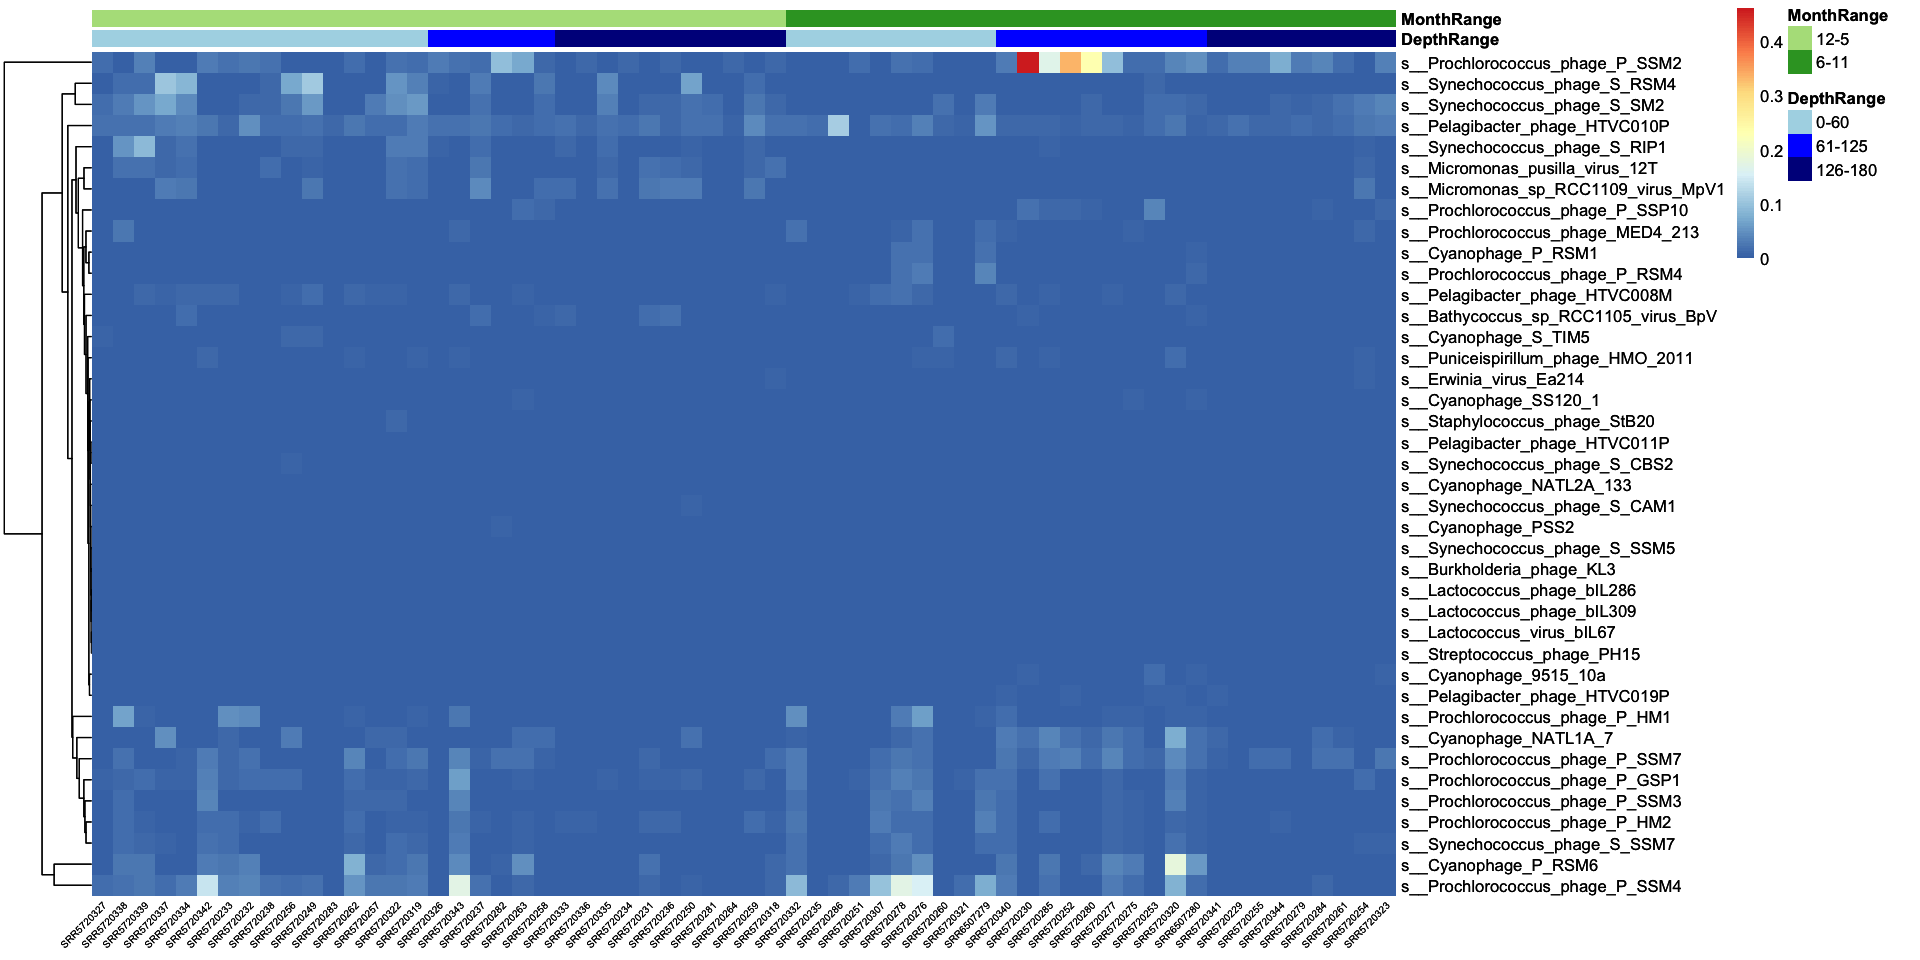

In [38]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

bats_sample_meta <- BATS_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.bats <- pheatmap(t(BATS_vir_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = bats_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("12-5", "6-11"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_BATS_MetaPhlAn3_Viruses_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.bats)
dev.off()

print(pheat.bats)